In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date[0]

'2017-08-23'

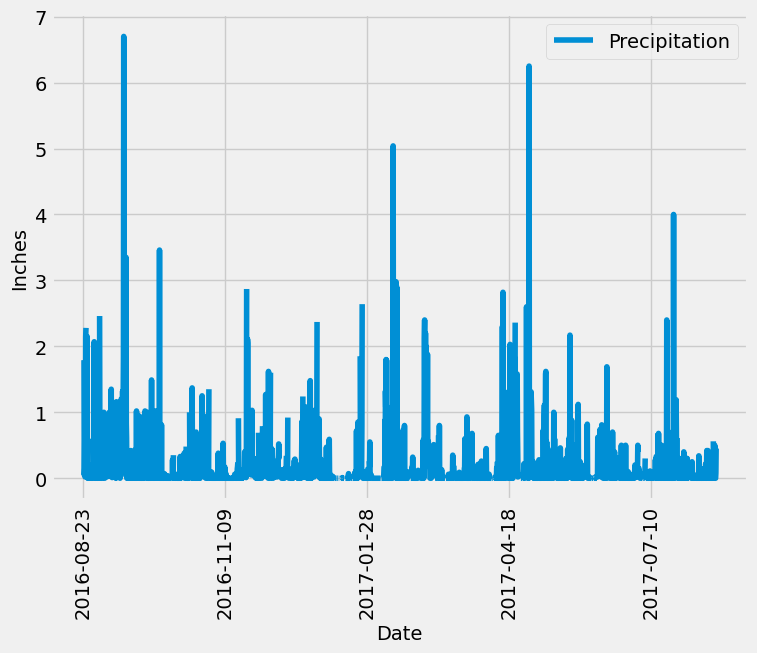

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
results_date = pd.to_datetime(date[0]) - dt.timedelta(days=365)
results_date_df= results_date.date()

# Perform a query to retrieve the data and precipitation scores

one_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= results_date_df)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame(one_year)
one_year_df.rename(columns={"date":"Date","prcp":"Precipitation"},inplace=True) 
one_year_df
# Sort the dataframe by date
one_year_df_sorted = one_year_df.sort_values(by="Date")
one_year_df_sorted.reset_index(drop=True)
one_year_df_sorted.head()
#Use Pandas Plotting with Matplotlib to plot the datax_axis = 'Date'
x_axis = 'Date'
y_axis = 'Precipitation'

one_year_df_sorted.plot(x_axis,y_axis, figsize=(8,6))
plt.legend(['Precipitation'])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.savefig("Plot_data_precip.png")
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
one_year_df_sorted.describe()

# Exploratory Station Analysis

In [12]:
one_year_df_sorted.head()


,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_Measurment_join=session.query(Measurement.station,func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
station_Measurment_join

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Design a query to calculate the total number of stations in the dataset
station_count=session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [15]:
active_station=session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

active_station

'USC00519281'

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==station_Measurment_join[0][0]).all()
temp

[(54.0, 85.0, 71.66378066378067)]

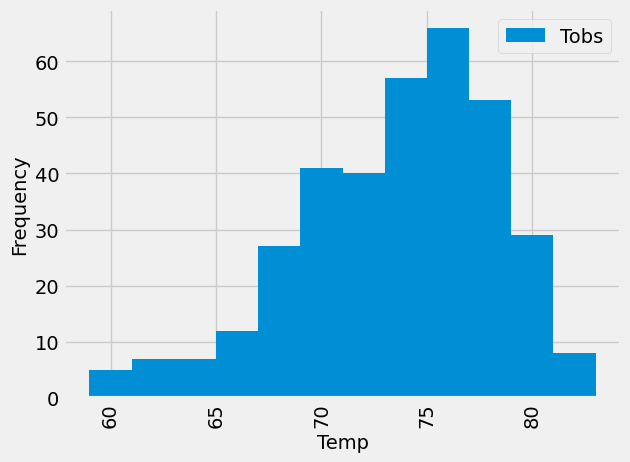

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_tobs = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= results_date_df).\
    filter(Measurement.station == active_station)



tobs_df = pd.DataFrame(one_year_tobs)
tobs_df
tobs_df.rename(columns={"date":"Date","tobs":"Tobs"},inplace=True) 
tobs_sorted = tobs_df.sort_values(by="Date")
tobs_sorted

tobs_sorted.plot.hist(bins=12)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.savefig("Year_tobs.png")
plt.show()

# Close Session

In [38]:
# Close Session
session.close()